<a href="https://colab.research.google.com/github/TateKessler/Tate-Kessler-Github/blob/main/ACC_Basketball_Homework_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('acc_players-2324F.csv')

print(df.head())


  Unnamed: 0     Unnamed: 1 Unnamed: 2 Unnamed: 3      Unnamed: 4 Totals  \
0         Rk         Player      Class        Pos          School      G   
1          1   Amaree Abram         SO          G    Georgia Tech     10   
2          2   Sola Adebisi         FR          F   Florida State      7   
3          3  Prince Aligbe         SO          F  Boston College     35   
4          4     Abe Atiyeh         SR          G  Boston College      4   

  Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  ... Unnamed: 11 Unnamed: 12  \
0         MP        TRB        AST        STL  ...         TOV          PF   
1        108         17         11          1  ...           9          10   
2          9          1          1          0  ...           1           1   
3        651        119         21         15  ...          30          51   
4          6          0          0          0  ...           1           0   

  Unnamed: 13 Shooting Unnamed: 15 Unnamed: 16 Unnamed: 17 Advanced  \
0  

In [4]:
df['Unnamed: 13'] = pd.to_numeric(df['Unnamed: 13'], errors='coerce')
total_points = df['Unnamed: 13'].sum()

print(total_points)


38411.0


In [6]:
df['Unnamed: 6'] = pd.to_numeric(df['Unnamed: 6'], errors='coerce')

max_minutes_player = df.loc[df['Unnamed: 6'].idxmax(), 'Unnamed: 1']
max_minutes = df['Unnamed: 6'].max()

print(max_minutes_player, max_minutes)

Casey Morsell 1333.0


In [7]:
df['Unnamed: 7'] = pd.to_numeric(df['Unnamed: 7'], errors='coerce')

top_5_rebounds = df[['Unnamed: 1', 'Unnamed: 7']].nlargest(5, 'Unnamed: 7')

top_5_rebounds.columns = ['Player', 'Total Rebounds']

print(top_5_rebounds)

              Player  Total Rebounds
6      Armando Bacot           380.0
179  Ian Schieffelin           340.0
91   Harrison Ingram           327.0
45    Mohamed Diarra           311.0
150    Norchad Omier           309.0


In [8]:
df_filtered = df[df['Unnamed: 6'] > 500].copy()

print(df_filtered.head())

   Unnamed: 0     Unnamed: 1 Unnamed: 2 Unnamed: 3      Unnamed: 4 Totals  \
3           3  Prince Aligbe         SO          F  Boston College     35   
5           5    Zack Austin         JR          F      Pittsburgh     33   
6           6  Armando Bacot         SR          F  North Carolina     37   
8           8  Reece Beekman         SR          G        Virginia     34   
10         10     Chris Bell         SO          F        Syracuse     32   

    Unnamed: 6  Unnamed: 7 Unnamed: 8 Unnamed: 9  ... Unnamed: 11 Unnamed: 12  \
3        651.0       119.0         21         15  ...          30          51   
5        746.0       137.0         29         32  ...          13          35   
6       1123.0       380.0         56         22  ...          60         100   
8       1114.0       124.0        212         68  ...          70          43   
10       865.0        75.0         21         18  ...          26          58   

   Unnamed: 13  Shooting Unnamed: 15 Unnamed: 16 U

In [10]:
df_filtered.columns = ['Rank', 'Player', 'Class', 'Position', 'School', 'Games', 'Minutes Played', 'Total Rebounds',
                       'Assists', 'Steals', 'Blocks', 'Turnovers', 'Personal Fouls', 'Points', 'Field Goal %',
                       '2-Point %', '3-Point %', 'Free Throw %', 'PER', 'Win Shares', 'BPM']

print(df_filtered.head())

   Rank         Player Class Position          School Games  Minutes Played  \
3     3  Prince Aligbe    SO        F  Boston College    35           651.0   
5     5    Zack Austin    JR        F      Pittsburgh    33           746.0   
6     6  Armando Bacot    SR        F  North Carolina    37          1123.0   
8     8  Reece Beekman    SR        G        Virginia    34          1114.0   
10   10     Chris Bell    SO        F        Syracuse    32           865.0   

    Total Rebounds Assists Steals  ... Turnovers Personal Fouls Points  \
3            119.0      21     15  ...        30             51  164.0   
5            137.0      29     32  ...        13             35  216.0   
6            380.0      56     22  ...        60            100  538.0   
8            124.0     212     68  ...        70             43  486.0   
10            75.0      21     18  ...        26             58  384.0   

    Field Goal % 2-Point % 3-Point % Free Throw %   PER Win Shares   BPM  
3    

In [16]:
most_assists_player = df_filtered.loc[df_filtered['Assists'].idxmax(), ['Player', 'Assists']]

print(most_assists_player)

Player     Reece Beekman
Assists              212
Name: 8, dtype: object


In [15]:
df_filtered['Assists'] = pd.to_numeric(df_filtered['Assists'], errors='coerce')

top_3_assists = df_filtered[['Player', 'Assists']].nlargest(3, 'Assists')

print(top_3_assists)

             Player  Assists
8     Reece Beekman      212
216  Jaeden Zackery      152
22    Elliot Cadeau      150


In [18]:
df_filtered['Blocks'] = pd.to_numeric(df_filtered['Blocks'], errors='coerce')

top_3_blocks = df_filtered[['Player', 'Blocks']].nlargest(3, 'Blocks')

print(top_3_blocks)


            Player  Blocks
52       Ryan Dunn      77
158   Quinten Post      61
6    Armando Bacot      56


In [20]:
total_points_by_school = df.groupby('Unnamed: 4')['Unnamed: 13'].sum()
print(total_points_by_school)


Unnamed: 4
Boston College    2667.0
Clemson           2785.0
Duke              2830.0
Florida State     2526.0
Georgia Tech      2272.0
Louisville        2304.0
Miami (FL)        2424.0
NC State          3101.0
North Carolina    3032.0
Notre Dame        2113.0
Pittsburgh        2495.0
School               0.0
Syracuse          2442.0
Virginia          2140.0
Virginia Tech     2547.0
Wake Forest       2733.0
Name: Unnamed: 13, dtype: float64


In [24]:
team_assists = df_filtered.groupby('School')['Assists'].sum().reset_index()

team_assists = team_assists.sort_values(by='Assists', ascending=False)

print(team_assists)



            School  Assists
7         NC State      502
1          Clemson      494
2             Duke      494
8   North Carolina      491
0   Boston College      440
10      Pittsburgh      430
13   Virginia Tech      417
12        Virginia      415
6       Miami (FL)      413
14     Wake Forest      410
4     Georgia Tech      405
11        Syracuse      402
5       Louisville      335
3    Florida State      328
9       Notre Dame      312


In [26]:
total_points_by_school = df.groupby('Unnamed: 4')['Unnamed: 13'].sum().sort_values(ascending=False)

top_3_schools_by_points = total_points_by_school.head(3)

print(top_3_schools_by_points)


Unnamed: 4
NC State          3101.0
North Carolina    3032.0
Duke              2830.0
Name: Unnamed: 13, dtype: float64


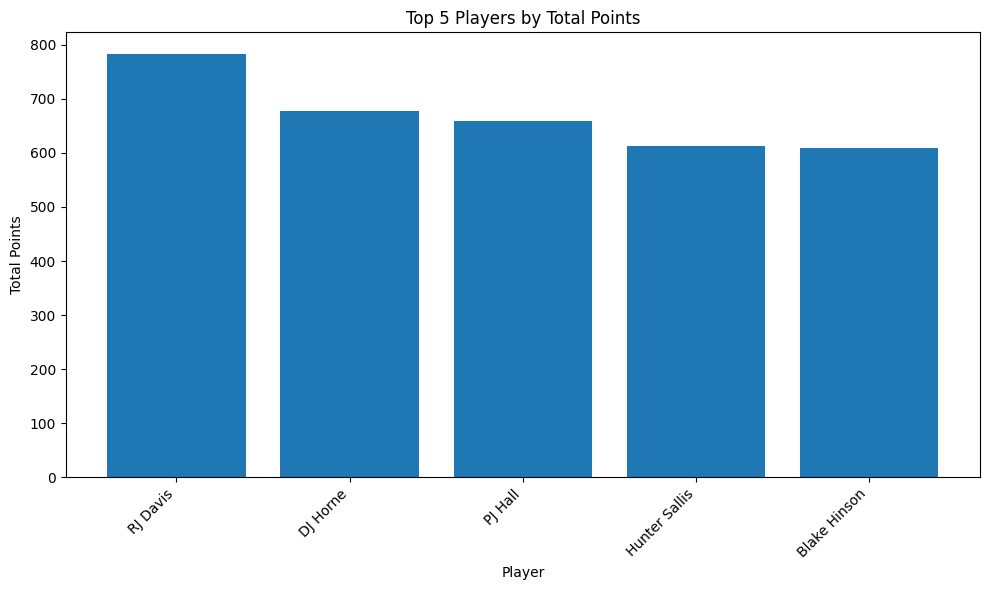

In [28]:
#Bonus graph

import matplotlib.pyplot as plt

top_5_scorers = df[['Unnamed: 1', 'Unnamed: 13']].nlargest(5, 'Unnamed: 13')
top_5_scorers.columns = ['Player', 'Points']

plt.figure(figsize=(10, 6))
plt.bar(top_5_scorers['Player'], top_5_scorers['Points'])
plt.xlabel('Player')
plt.ylabel('Total Points')
plt.title('Top 5 Players by Total Points')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


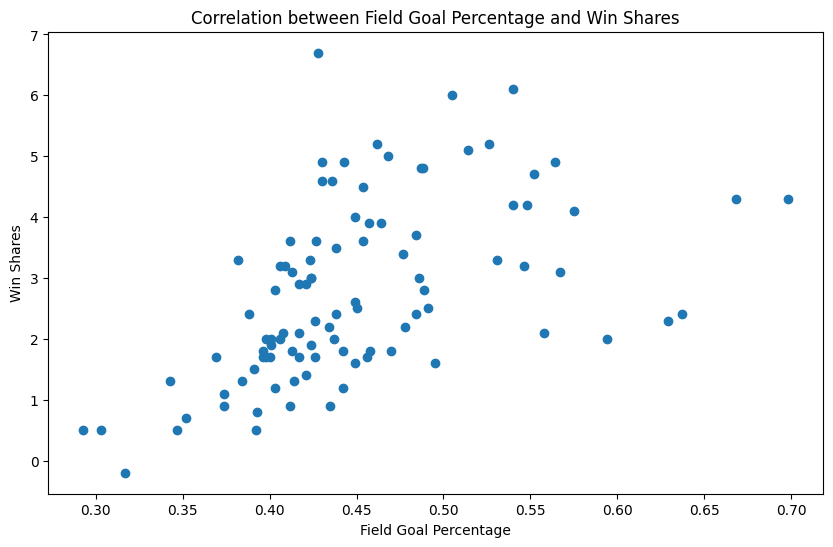

Correlation coefficient between FG% and Win Shares: 0.5195835052001343


In [31]:
import matplotlib.pyplot as plt
import numpy as np

df_filtered['Field Goal %'] = pd.to_numeric(df_filtered['Field Goal %'], errors='coerce')
df_filtered['Win Shares'] = pd.to_numeric(df_filtered['Win Shares'], errors='coerce')

df_filtered_cleaned = df_filtered.dropna(subset=['Field Goal %', 'Win Shares'])

plt.figure(figsize=(10, 6))
plt.scatter(df_filtered_cleaned['Field Goal %'], df_filtered_cleaned['Win Shares'])
plt.xlabel('Field Goal Percentage')
plt.ylabel('Win Shares')
plt.title('Correlation between Field Goal Percentage and Win Shares')
plt.show()

correlation_coefficient = df_filtered_cleaned['Field Goal %'].corr(df_filtered_cleaned['Win Shares'])
print(f"Correlation coefficient between FG% and Win Shares: {correlation_coefficient}")


Through this assignment, I significantly improved my ability to filter data efficiently. By working with this csv file that was strangely labeled, I learned how to apply conditional filtering to isolate subsets of data, like identifying players who played more than 500 minutes or pulling the top performers in categories like assists and blocks. This filtering process was made way harder by the “unnamed” column titles from the CSV file and I need to find a quicker way to work around this. These filtering techniques are important for future data analysis projects, because they let me run more specific queries on large datasets so I can extract information and insights accurately.
One of the biggest challenges in this assignment was dealing with the unnamed columns in the dataset. Since the data lacked clear labels, it was difficult to interpret and run queries accurately. To overcome this, I looked at the structure of the data first, identified the columns, and tried to rename them to more intuitive labels like "Player," "Minutes Played," and "Assists." within the condensed data frame of players over 500 minutes. This helped me to streamline the analysis and avoid potential errors in querying specific columns, helping make sure the calculations were accurate. However, I couldn't figure out how to make this work on the larger data set so I continued with the unnamed labels.
This project showed me how useful data analysis can be in different areas not just sports, but also business and healthcare. Being able to sort through data and make sense of it helps people make smarter choices, like figuring out which players are most valuable or spotting trends in how a company is doing. Dealing with messy data that wasn't organized exactly how I wanted taught me a lot about handling real-world information, which often will need to be cleaned up before I can learn anything useful from it. I feel like I've gained skills that I could use to solve all kinds of problems in different industries.
